# EXPLORATORY DATA ANALYSIS ON NIFTY 50

## About Dataset
* For this analysis, i have take stock data of RELIANCE, ADANIPORT AND POWERGRID. historic VWAP(VOLUME WEIGHTED AVERAGE PRICE) is the target variable to predict Stock market.

* The data presented here, is from 1st jan 2000 to 31 july 2020
* I mainly focus the data from 2015-08-31 to 2020-08-31 because to do systematic Data analysis.
* The mainly to do this ill explain during presentation in better way.

# Importing element

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib as plt

sns.set(color_codes=True)
import plotly.graph_objects as go
from datetime import datetime
from pmdarima import auto_arima
from matplotlib import pyplot as plt

In [2]:
adani = pd.read_csv('ADANIPORTS.csv')
reliance = pd.read_csv('RELIANCE.csv')
powergrid = pd.read_csv('POWERGRID.csv')
asianpaint = pd.read_csv('ASIANPAINT.csv')

# Quick Glimpse of Stocks

In [3]:
a=adani.head(6)
a

Date      Symbol Series  Prev Close    Open     High    Low    Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0   959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0   885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0   887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0   929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0   980.0   
5  2007-12-04  MUNDRAPORT     EQ      969.30  985.00  1056.00  976.0  1049.0   

     Close     VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0   962.90   984.72  27294366  2.687719e+15     NaN             9859619   
1   893.90   941.38   4581338  4.312765e+14     NaN             1453278   
2   884.20   888.09   5124121  4.550658e+14     NaN             1069678   
3   921.55   929.17   4609762  4.283257e+14     NaN             1260913   
4   969.30   965.65   2977470  2.875200e+14     NaN              816123   
5  1041.45  1015.39   4849250  4.923867e+14     NaN             1537667   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4       0.2741  
5       0.3171

In [4]:
r=reliance.head(6)
r

Date    Symbol Series  Prev Close    Open    High     Low    Last  \
0  2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50  251.70   
1  2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30  271.85   
2  2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65  286.75   
3  2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00  293.50   
4  2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00  314.50   
5  2000-01-10  RELIANCE     EQ      314.55  317.40  318.70  305.30  306.65   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  251.70  249.37   4456424  1.111319e+14     NaN                 NaN   
1  271.85  263.52   9487878  2.500222e+14     NaN                 NaN   
2  282.50  274.79  26833684  7.373697e+14     NaN                 NaN   
3  294.35  295.45  15682286  4.633254e+14     NaN                 NaN   
4  314.55  308.91  19870977  6.138388e+14     NaN                 NaN   
5  308.50  312.35  13417057  4.190855e+14     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN

In [5]:
p=powergrid.head(6)
p

Date     Symbol Series  Prev Close   Open    High     Low    Last  \
0  2007-10-05  POWERGRID     EQ       52.00   89.8  109.50   83.15  100.20   
1  2007-10-08  POWERGRID     EQ      100.60  104.0  104.00   94.85   95.30   
2  2007-10-09  POWERGRID     EQ       95.45   95.5  102.85   90.35  102.10   
3  2007-10-10  POWERGRID     EQ      101.95  104.6  105.00  102.00  102.65   
4  2007-10-11  POWERGRID     EQ      102.90  120.0  120.00  102.00  114.85   
5  2007-10-12  POWERGRID     EQ      114.40  112.0  117.90  111.00  114.25   

    Close    VWAP     Volume      Turnover  Trades  Deliverable Volume  \
0  100.60  102.49  481058927  4.930561e+15     NaN           181390171   
1   95.45   98.12   71252858  6.991616e+14     NaN            22115293   
2  101.95   98.57   65658228  6.471784e+14     NaN            16991920   
3  102.90  103.66   38211410  3.960887e+14     NaN            16409289   
4  114.40  110.78   59805552  6.625235e+14     NaN            17530826   
5  113.65  115.56   55918584  6.461714e+14     NaN            15832822   

   %Deliverble  
0       0.3771  
1       0.3104  
2       0.2588  
3       0.4294  
4       0.2931  
5       0.2831

# Data Preparation

In [6]:
#Setting the data as index value

adani['Date'] = pd.to_datetime(adani['Date'])
adani.set_index(['Date'],drop=False,inplace=True)


reliance['Date'] = pd.to_datetime(reliance['Date'])
reliance.set_index(['Date'],drop=False,inplace=True)


powergrid['Date'] = pd.to_datetime(powergrid['Date'])
powergrid.set_index(['Date'],drop=False,inplace=True)

ap=asianpaint['Date'] = pd.to_datetime(asianpaint['Date'])
asianpaint.set_index(['Date'],drop=False,inplace=True)


In [7]:
#Drop columns
adani.drop(['Prev Close','Last','Deliverable Volume','%Deliverble'],axis=1, inplace=True)
reliance.drop(['Prev Close','Last','Deliverable Volume','%Deliverble'],axis=1, inplace=True)
powergrid.drop(['Prev Close','Last','Deliverable Volume','%Deliverble'],axis=1, inplace=True)


# After Droping some of the columns

In [8]:
adani.head(3)

Date      Symbol Series   Open     High    Low  Close  \
Date                                                                     
2007-11-27 2007-11-27  MUNDRAPORT     EQ  770.0  1050.00  770.0  962.9   
2007-11-28 2007-11-28  MUNDRAPORT     EQ  984.0   990.00  874.0  893.9   
2007-11-29 2007-11-29  MUNDRAPORT     EQ  909.0   914.75  841.0  884.2   

              VWAP    Volume      Turnover  Trades  
Date                                                
2007-11-27  984.72  27294366  2.687719e+15     NaN  
2007-11-28  941.38   4581338  4.312765e+14     NaN  
2007-11-29  888.09   5124121  4.550658e+14     NaN

In [9]:
reliance.head(3)

Date    Symbol Series    Open    High     Low   Close  \
Date                                                                     
2000-01-03 2000-01-03  RELIANCE     EQ  237.50  251.70  237.50  251.70   
2000-01-04 2000-01-04  RELIANCE     EQ  258.40  271.85  251.30  271.85   
2000-01-05 2000-01-05  RELIANCE     EQ  256.65  287.90  256.65  282.50   

              VWAP    Volume      Turnover  Trades  
Date                                                
2000-01-03  249.37   4456424  1.111319e+14     NaN  
2000-01-04  263.52   9487878  2.500222e+14     NaN  
2000-01-05  274.79  26833684  7.373697e+14     NaN

In [10]:
powergrid.head(3)

Date     Symbol Series   Open    High    Low   Close    VWAP  \
Date                                                                            
2007-10-05 2007-10-05  POWERGRID     EQ   89.8  109.50  83.15  100.60  102.49   
2007-10-08 2007-10-08  POWERGRID     EQ  104.0  104.00  94.85   95.45   98.12   
2007-10-09 2007-10-09  POWERGRID     EQ   95.5  102.85  90.35  101.95   98.57   

               Volume      Turnover  Trades  
Date                                         
2007-10-05  481058927  4.930561e+15     NaN  
2007-10-08   71252858  6.991616e+14     NaN  
2007-10-09   65658228  6.471784e+14     NaN

# Analysing the data of each columns

In [11]:
adani.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3322 entries, 2007-11-27 to 2021-04-30
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3322 non-null   datetime64[ns]
 1   Symbol    3322 non-null   object        
 2   Series    3322 non-null   object        
 3   Open      3322 non-null   float64       
 4   High      3322 non-null   float64       
 5   Low       3322 non-null   float64       
 6   Close     3322 non-null   float64       
 7   VWAP      3322 non-null   float64       
 8   Volume    3322 non-null   int64         
 9   Turnover  3322 non-null   float64       
 10  Trades    2456 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 311.4+ KB


In [12]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5306 non-null   datetime64[ns]
 1   Symbol    5306 non-null   object        
 2   Series    5306 non-null   object        
 3   Open      5306 non-null   float64       
 4   High      5306 non-null   float64       
 5   Low       5306 non-null   float64       
 6   Close     5306 non-null   float64       
 7   VWAP      5306 non-null   float64       
 8   Volume    5306 non-null   int64         
 9   Turnover  5306 non-null   float64       
 10  Trades    2456 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 497.4+ KB


In [13]:
#POWERGRID
powergrid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3359 entries, 2007-10-05 to 2021-04-30
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3359 non-null   datetime64[ns]
 1   Symbol    3359 non-null   object        
 2   Series    3359 non-null   object        
 3   Open      3359 non-null   float64       
 4   High      3359 non-null   float64       
 5   Low       3359 non-null   float64       
 6   Close     3359 non-null   float64       
 7   VWAP      3359 non-null   float64       
 8   Volume    3359 non-null   int64         
 9   Turnover  3359 non-null   float64       
 10  Trades    2456 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 314.9+ KB


# Creating a new DataFrame which show the records of 5 years which is between 31/8/2015 - 31/8/2020

* No null value were found now

In [14]:
#Creating a new DataFrame which show the records of 5 years which is between 31/8/2015 - 31/8/2020
a1=adani.loc['2015-08-31':'2020-08-31']
r1=reliance.loc['2015-08-31':'2020-08-31']
p1=powergrid.loc['2015-08-31':'2020-08-31']

In [15]:
#ADANIPORT
a1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2015-08-31 to 2020-08-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1235 non-null   datetime64[ns]
 1   Symbol    1235 non-null   object        
 2   Series    1235 non-null   object        
 3   Open      1235 non-null   float64       
 4   High      1235 non-null   float64       
 5   Low       1235 non-null   float64       
 6   Close     1235 non-null   float64       
 7   VWAP      1235 non-null   float64       
 8   Volume    1235 non-null   int64         
 9   Turnover  1235 non-null   float64       
 10  Trades    1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 115.8+ KB


In [16]:
#RELIANCE
r1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2015-08-31 to 2020-08-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1235 non-null   datetime64[ns]
 1   Symbol    1235 non-null   object        
 2   Series    1235 non-null   object        
 3   Open      1235 non-null   float64       
 4   High      1235 non-null   float64       
 5   Low       1235 non-null   float64       
 6   Close     1235 non-null   float64       
 7   VWAP      1235 non-null   float64       
 8   Volume    1235 non-null   int64         
 9   Turnover  1235 non-null   float64       
 10  Trades    1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 115.8+ KB


In [17]:
#POWERGRID
p1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2015-08-31 to 2020-08-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1235 non-null   datetime64[ns]
 1   Symbol    1235 non-null   object        
 2   Series    1235 non-null   object        
 3   Open      1235 non-null   float64       
 4   High      1235 non-null   float64       
 5   Low       1235 non-null   float64       
 6   Close     1235 non-null   float64       
 7   VWAP      1235 non-null   float64       
 8   Volume    1235 non-null   int64         
 9   Turnover  1235 non-null   float64       
 10  Trades    1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 115.8+ KB


# visualization of RELIANCE in Candle stick  

In [18]:
df=r1
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template="simple_white",
    title='CANDLESTICK CHART FOR RELIANCE',
)

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Price')
fig.show()


# visualization of ADANIPORT in Candle stick 

In [19]:
df=a1
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template="simple_white",
    title='CANDLESTICK CHART FOR ADANIPORT',
)

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Price')
fig.show()

# visualization of PowerGrid in Candle stick

In [20]:
df=p1
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template="simple_white",
    title='CANDLESTICK CHART FOR POWERGRID',
)

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Price')
fig.show()

# Which of the Three is the most Liquid Stock?
  > Column Used 'TURNNOVER'

    1) Turnover is calculated by dividing the number of shares traded over a Particular period by the number of shares
    2) Share turnover is a measure of stock liquidity. The higher the turnover, the more liquid company shares are.
    
   #### Liquid Stock - When stock is ready to convert into cash without affecting its market price.

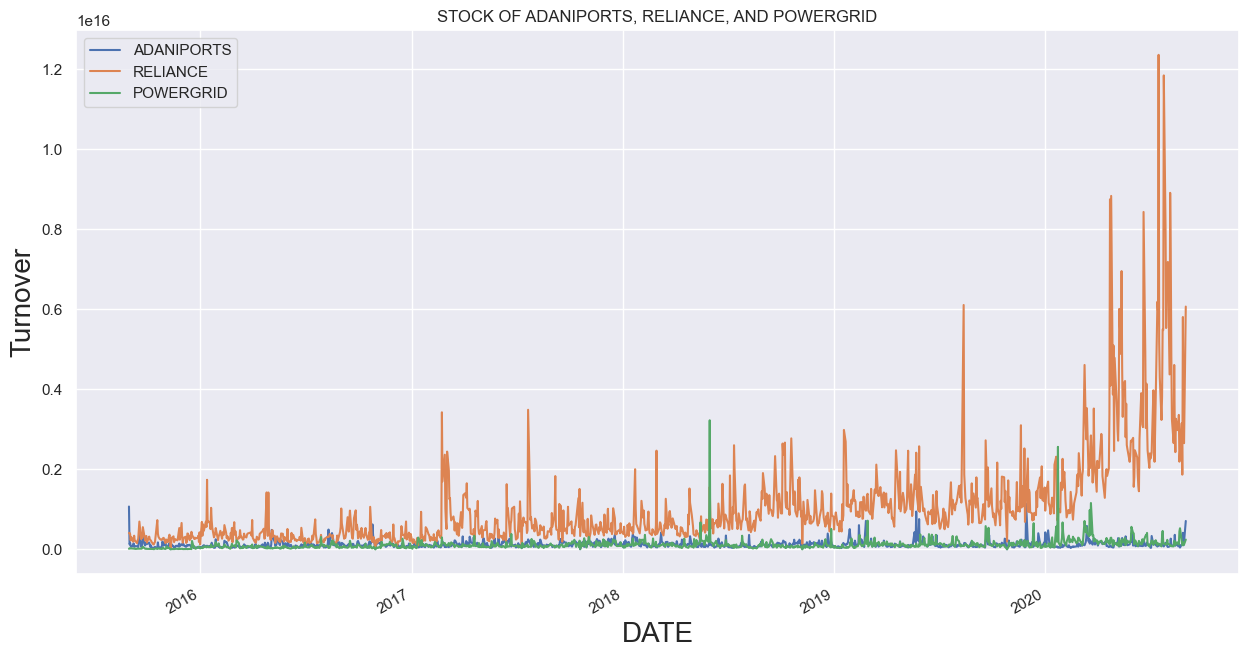

In [21]:
a1['Turnover'].plot(label = 'ADANIPORTS', figsize=(15,8));
r1['Turnover'].plot(label = 'RELIANCE');
p1['Turnover'].plot(label = 'POWERGRID');
plt.legend()
plt.title('STOCK OF ADANIPORTS, RELIANCE, AND POWERGRID')
plt.xlabel('DATE',size=20)
plt.ylabel('Turnover', size=20);


-Investors may be willing to put money in ADANIPORT because turnover is low as compare to other company, investor may not think to invest in Reliance.

## 2.
  ## 1) How is the VWAP of share in Relience?

##### The volume-weighted average price (VWAP) is a technical analysis indicator used on intraday charts that resets at the start of every new trading session.

##### It's a trading benchmark that represents the average price a security has traded at throughout the day, based on both volume and price.

###### VWAP is important because it provides traders with pricing insight into both the trend and value of a security.

In [22]:
fig = go.Figure([go.Scatter(x=a1.index, y=a1['VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP OF ADANIPORT OVER TIME',
    template="simple_white",
)
fig.update_xaxes(title='DATE')
fig.update_yaxes(title='PRICE')
fig.show()


## 2. How is the Trend in VWAP of  share of RELIANCE?

In [23]:
fig = go.Figure([go.Scatter(x=r1.index, y=r1['VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP OF RELIANCE OVER TIME',
    template="simple_white",
)
fig.update_xaxes(title='DATE')
fig.update_yaxes(title='PRICE')
fig.show()


### Reliance Industries  touched a new 52-week high of Rs 832.70 per piece on stock exchanges as the company has started trading ex-bonus from Thursday (September 07, 2017) onwards. For the past six-consecutive days, the share price has been rallying and gained by neary 8%.

## 3. How is the Trend in VWAP of  share of POWERGRID?

In [24]:
fig = go.Figure([go.Scatter(x=p1.index, y=p1['VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP OF POWERGRID OVER TIME',
    template="simple_white",
)
fig.update_xaxes(title='DATE')
fig.update_yaxes(title='PRICE')
fig.show()


# 4) Compare VWAP of 'Adaniport', 'Reliance', 'Powergrid'

Text(0, 0.5, 'VWAP')

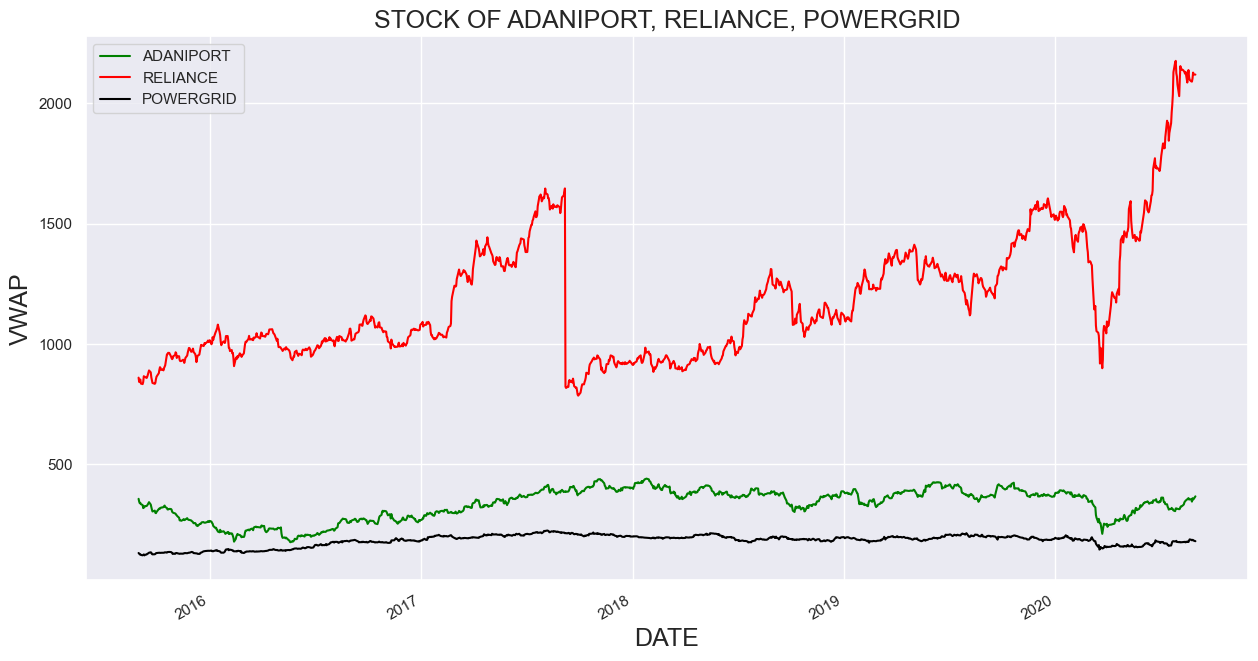

In [25]:
a1['VWAP'].plot(label= 'ADANIPORT', figsize=(15,8), color= 'Green' );
r1['VWAP'].plot(label= 'RELIANCE', color='red');
p1['VWAP'].plot(label= 'POWERGRID', color = 'Black');
plt.legend()
plt.title('STOCK OF ADANIPORT, RELIANCE, POWERGRID',size = 18)
plt.xlabel('DATE', size=18)
plt.ylabel('VWAP', size=18)

   ##### Retail and professional traders may use the VWAP as part of their IntradayTraiding 

# 5. Analyse the open price when volume of transaction have a big spikes?

Text(0, 0.5, 'VWAP')

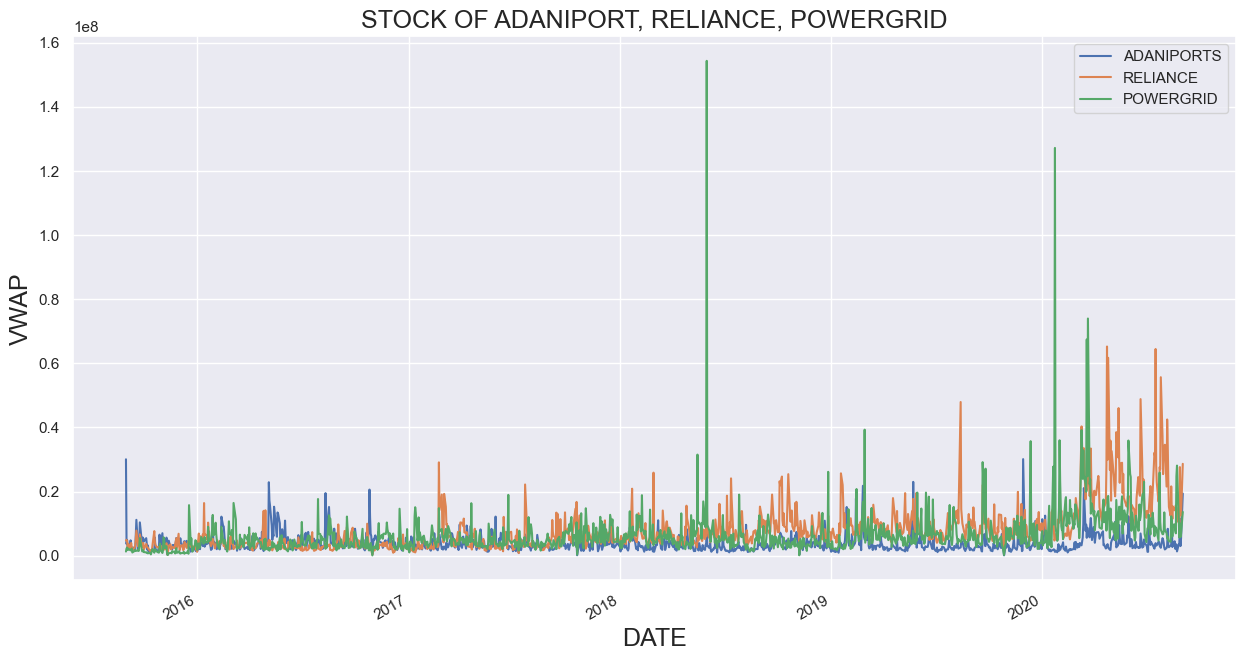

In [26]:
a1['Volume'].plot(label='ADANIPORTS', figsize=(15,8))
r1['Volume'].plot(label='RELIANCE')
p1['Volume'].plot(label='POWERGRID')
plt.legend()
plt.title('STOCK OF ADANIPORT, RELIANCE, POWERGRID',size = 18)
plt.xlabel('DATE', size=18)
plt.ylabel('VWAP', size=18)


In [27]:
p1.iloc[[p1['Volume'].argmax()]]

Date     Symbol Series   Open   High    Low   Close    VWAP  \
Date                                                                           
2018-05-31 2018-05-31  POWERGRID     EQ  209.9  212.7  201.6  209.45  209.19   

               Volume      Turnover    Trades  
Date                                           
2018-05-31  154323307  3.228302e+15  186117.0

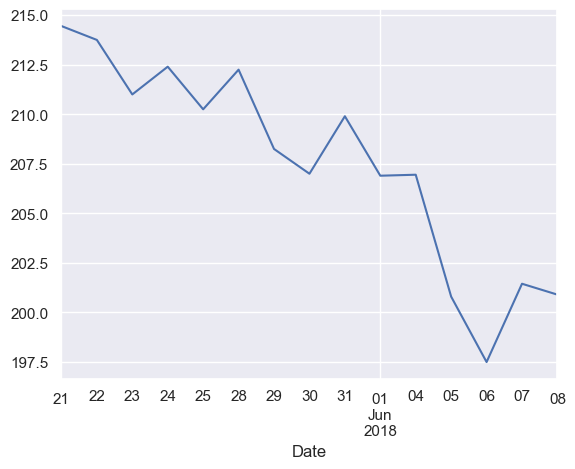

In [28]:
#POWERGRID
p1.loc['2018-05-20':'2018-06-10']['Open'].plot();

#### There is a drop on 6th june of 2018 in (open price) when the volume of transaction went up in POWERGRID

# 6)Which of the three stocks is most valuable?

* Here we take the total Traded as product of 'Open price' and 'volume'  because it helps the investors choose the stock that meet their risk and expected return.

In [29]:
a1['Total Traded']= a1['Open']*a1['Volume']
r1['Total Traded']= r1['Open']*r1['Volume']
p1['Total Traded']= p1['Open']*p1['Volume']


C:\Users\91600\AppData\Local\Temp\ipykernel_16276\3576090018.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91600\AppData\Local\Temp\ipykernel_16276\3576090018.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91600\AppData\Local\Temp\ipykernel_16276\3576090018.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Text(0, 0.5, 'Total Traded')

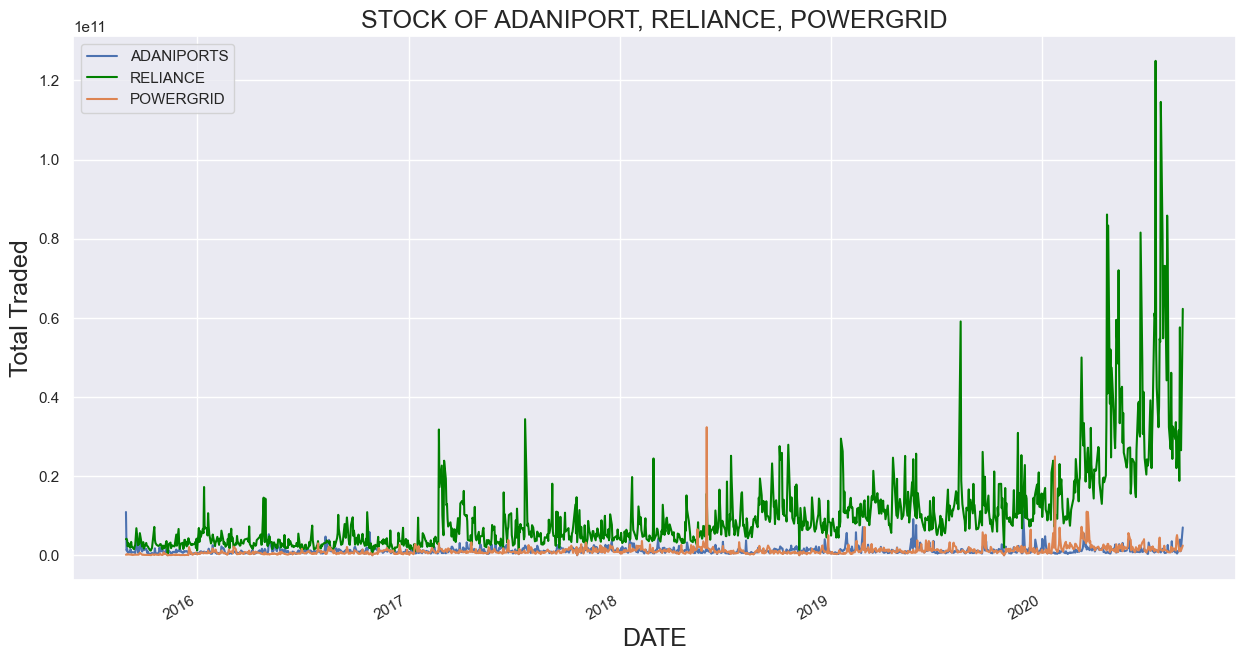

In [30]:
a1['Total Traded'].plot(label='ADANIPORTS', figsize=(15,8))
r1['Total Traded'].plot(label='RELIANCE', color ='Green')
p1['Total Traded'].plot(label='POWERGRID')
plt.legend()
plt.title('STOCK OF ADANIPORT, RELIANCE, POWERGRID',size = 18)
plt.xlabel('DATE', size=18)
plt.ylabel('Total Traded', size=18)

In [31]:
r1.iloc[[r1['Total Traded'].argmax()]]

Date    Symbol Series     Open    High     Low   Close  \
Date                                                                      
2020-07-15 2020-07-15  RELIANCE     EQ  1937.95  1978.8  1798.0  1844.0   

               VWAP    Volume      Turnover     Trades  Total Traded  
Date                                                                  
2020-07-15  1917.63  64458598  1.236080e+16  1285533.0  1.249175e+11

# Here we can say Reliance is Dominating in terms of Total Trade
* So invester may think to invest in Reliance and also it seems to be valuable stock
* In 2020-07-15  graph shows the high respond as compare to other stock

# 7)DAILY RETURN
* Daily return is calculated by subtracting the opening price from the closing price.

In [32]:
a1['Return'] = a1['Open']-a1['Close']
r1['Return'] = r1['Open']-r1['Close']
p1['Return'] = p1['Open']-p1['Close']

C:\Users\91600\AppData\Local\Temp\ipykernel_16276\1085455187.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91600\AppData\Local\Temp\ipykernel_16276\1085455187.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91600\AppData\Local\Temp\ipykernel_16276\1085455187.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Text(0, 0.5, 'Return')

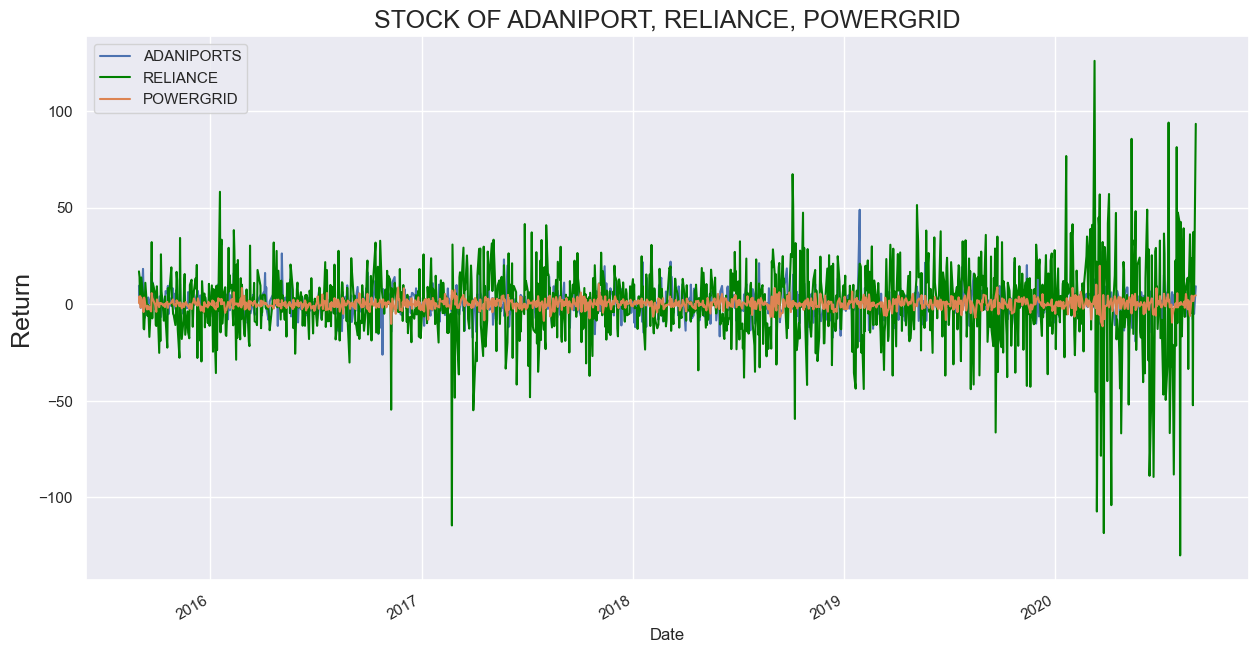

In [33]:
a1['Return'].plot(label='ADANIPORTS', figsize=(15,8))
r1['Return'].plot(label='RELIANCE', color ='Green')
p1['Return'].plot(label='POWERGRID')
plt.legend()
plt.title('STOCK OF ADANIPORT, RELIANCE, POWERGRID',size = 18)
plt.ylabel('Return', size=18)

#### Above charts represent the volatility of stock 
* If the line shows in a lower or constant stage that means volatility ia high
* Volatility is an investment term that describes when a market or security experiences periods of unpredictable, and sometimes sharp, price movements. People often think about volatility only when prices fall, however volatility can also refer to sudden price rises too.


## 7)   If we add one Rupee in each stock how much return we expect to get on 31st Aug 2015?

In [34]:
r1['Cumulative_Return'] = (1+ r1['Return'])
a1['Cumulative_Return'] = (1+ a1['Return'])
p1['Cumulative_Return'] = (1+ p1['Return'])

C:\Users\91600\AppData\Local\Temp\ipykernel_16276\891955606.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91600\AppData\Local\Temp\ipykernel_16276\891955606.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91600\AppData\Local\Temp\ipykernel_16276\891955606.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [35]:
#Reliance
r1['Cumulative_Return'].head(1)

Date
2015-08-31    17.95
Name: Cumulative_Return, dtype: float64

In [36]:
#Adaniport
a1['Cumulative_Return'].head(1)

Date
2015-08-31    10.55
Name: Cumulative_Return, dtype: float64

In [37]:
#Powergrid
p1['Cumulative_Return'].head(1)

Date
2015-08-31    4.85
Name: Cumulative_Return, dtype: float64

# Analysing Asianpaint

In [38]:
asianpaint.head(3)

Date      Symbol Series  Prev Close   Open   High    Low  \
Date                                                                        
2000-01-03 2000-01-03  ASIANPAINT     EQ      361.20  370.0  390.0  370.0   
2000-01-04 2000-01-04  ASIANPAINT     EQ      381.65  380.0  392.0  375.0   
2000-01-05 2000-01-05  ASIANPAINT     EQ      385.55  371.5  390.0  371.5   

             Last   Close    VWAP  Volume      Turnover  Trades  \
Date                                                              
2000-01-03  385.0  381.65  380.54    3318  1.262617e+11     NaN   
2000-01-04  390.0  385.55  383.50    4818  1.847699e+11     NaN   
2000-01-05  383.0  383.00  379.81    2628  9.981384e+10     NaN   

            Deliverable Volume  %Deliverble  
Date                                         
2000-01-03                 NaN          NaN  
2000-01-04                 NaN          NaN  
2000-01-05                 NaN          NaN

<AxesSubplot: xlabel='Date'>

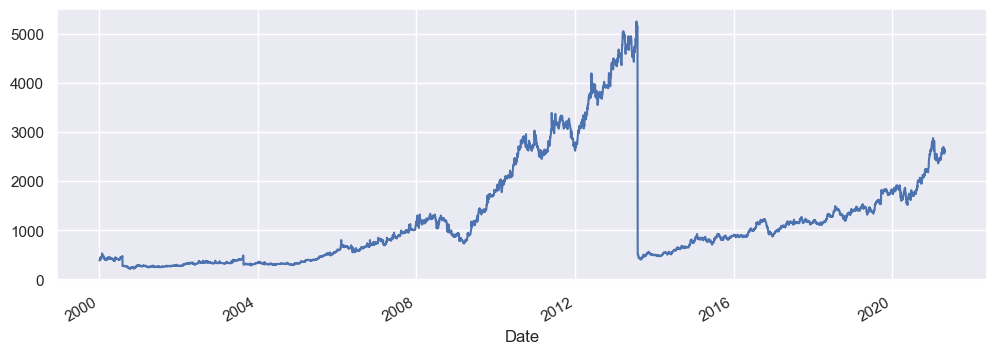

In [39]:
asianpaint['High'].plot(figsize=(12,4))

In [40]:
fig = go.Figure([go.Scatter(x=asianpaint.index, y=asianpaint['High'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='HIGH OF ASIANPAINT OVER TIME',
    template="simple_white",
)
fig.update_xaxes(title='DATE')
fig.update_yaxes(title='PRICE')
fig.show()


### The reason for the fall was stock-split. Shareholders received 10 equity shares of face value Rs. 1 each for every 1 equity share they held of face value Rs. 10 each of the company.

* So instead of having 1 share of Rs. 5,000, you’d have 10 shares of Rs. 500 after the stock split.

* Stock split is done for two reasons

* #### 1)To make shares affordable for investors who could not buy the shares of that company before due to high prices 
* 2)To infuse liquidity

# ASIANPAINT 
## Minimum VWAP of each year

In [41]:
asianpaint.resample(rule='A').min()['VWAP']

Date
2000-12-31     212.22
2001-12-31     241.09
2002-12-31     266.09
2003-12-31     276.59
2004-12-31     271.97
2005-12-31     309.87
2006-12-31     529.46
2007-12-31     660.51
2008-12-31     850.85
2009-12-31     716.43
2010-12-31    1756.47
2011-12-31    2404.95
2012-12-31    2583.83
2013-12-31     386.52
2014-12-31     463.46
2015-12-31     697.70
2016-12-31     839.34
2017-12-31     898.17
2018-12-31    1101.44
2019-12-31    1302.58
2020-12-31    1501.44
2021-12-31    2305.79
Freq: A-DEC, Name: VWAP, dtype: float64

<AxesSubplot: xlabel='Date'>

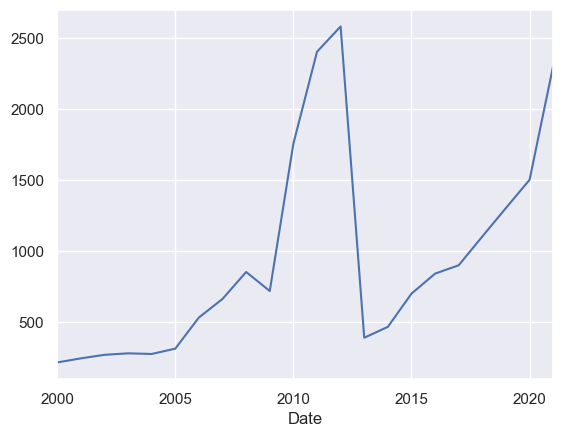

In [42]:
asianpaint.resample(rule='A').min()['VWAP'].plot()

## # Maximum  VWAP of each year

In [43]:
asianpaint.resample(rule='A').max()['VWAP']

Date
2000-12-31     484.00
2001-12-31     282.65
2002-12-31     368.94
2003-12-31     459.32
2004-12-31     343.62
2005-12-31     575.49
2006-12-31     733.11
2007-12-31    1111.48
2008-12-31    1286.43
2009-12-31    1799.14
2010-12-31    2987.69
2011-12-31    3324.14
2012-12-31    4452.79
2013-12-31    5175.79
2014-12-31     797.55
2015-12-31     916.56
2016-12-31    1215.80
2017-12-31    1255.56
2018-12-31    1456.49
2019-12-31    1820.66
2020-12-31    2748.72
2021-12-31    2848.24
Freq: A-DEC, Name: VWAP, dtype: float64

<AxesSubplot: xlabel='Date'>

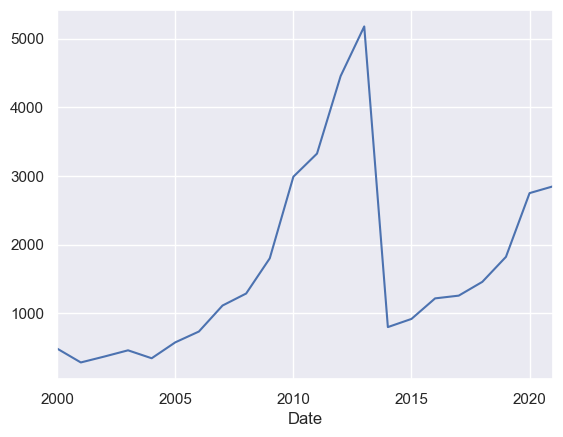

In [44]:
asianpaint.resample(rule='A').max()['VWAP'].plot()